In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0

# Chapter 5 exercise

## Question 1

In [2]:
def myplotter(x,y,yexact):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.tight_layout(pad=5.0) #increase subplot spacing
  fig.suptitle('Estimated integral of the given IVP')
  ax1.plot(x, y)
  ax2.plot(x,abs(y-yexact))
  ax1.set(xlabel='$x$',ylabel='Estimate')
  ax2.set(xlabel='$x$',ylabel='Error')
  print('Maximum error:', max(abs(y-yexact)))
  plt.show()
  return

Maximum error: 1.0682088813496193e-06


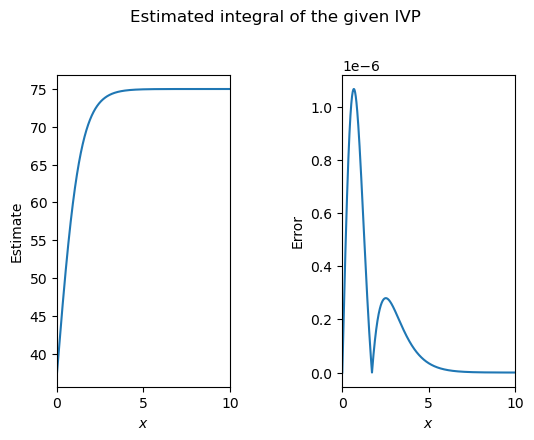

In [3]:
from scipy.optimize import fsolve

def trapzo(f,x0,tRange,h=1e-3,**kwargs):
  tmin,tmax=tRange
  stop=tmax+2*h    
  t = np.arange(tmin,stop,h)  #stop value is not included
  
  n=len(t);                   #get number of values
  x=np.empty(n); x[0]=x0      #form output array

  for k in range(n-1):
      t1,x1=t[k],x[k]     #labels introduced for convenience
      t2=t1+h             #this is the same as t[k+1]

      F = lambda x2: (x2-x1-h/2*(f(t1,x1,**kwargs)+f(t2,x2,**kwargs))) 
      x2=fsolve(F,x1)     #Solve backward difference
      x[k+1]=x2       
  return t,x

x0=75/2; tRange=[0,10]
def dxdt(t,x,r,C):
  return r*x*(1-x/C)
t,x=trapzo(dxdt,x0,tRange,r=1.5,C=75)

r=1.5;C=75
xexact = C/(1+np.exp(-r*t))
myplotter(t,x,xexact)

## Question 2

In [4]:
# Fixed point method
xg=0.2        #Initial guess 
xn=np.cos(xg) #Next guess

tol=1e-7
while np.abs(xg-xn)>tol:
  xg,xn=xn,np.cos(xn)
print(xn)

# Using fsolve
F = lambda x: x-np.cos(x)
xs=fsolve(F,0.2)
print(xs[0])

0.7390851672093751
0.7390851332151606


## Question 3

We can convert it to a first order system by introducing $y=\dot{x}$ to obtain

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}\begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}y\\r^2 x(1-x/C)(1-2x/C)\end{bmatrix}
\end{equation}

C:\Users\Ella Metcalfe\AppData\Local\Temp\ipykernel_7872\3599465400.py:22: RuntimeWarning: overflow encountered in double_scalars
  dydt=r**2*x*(1-x/C)*(1-2*x/C)


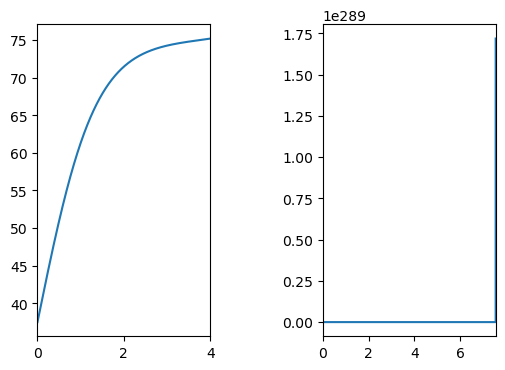

In [5]:
def eulerf(F,X0,tRange,h=1e-3,**kwargs):
  tmin,tmax=tRange
  stop=tmax+2*h    
  t = np.arange(tmin,stop,h)    #stop value is not included

  X0 = np.array([X0]).flatten() #make x0 a 1D array
  n=len(t); m=len(X0)           #get number of values
  X=np.empty([n,m]); X[0]=X0    #form output array

  for k in range(n-1):
    t1,X1=t[k],X[k]             #labels introduced for convenience
    X2=X1+h*F(t1,X1,**kwargs)   #Euler forward difference 
    X[k+1]=X2
  
  return t,X

r=1.5; C=75;

def dXdt(t,X,r,C):
  x,y = X
  dxdt= y 
  dydt=r**2*x*(1-x/C)*(1-2*x/C)
  return np.array([dxdt,dydt])

X0=[C/2,r*C/4]; # initial conditions

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=5.0) #increase subplot spacing 
t,X=eulerf(dXdt,X0,[0,4],r=r,C=C)
ax1.plot(t,X[:,0])

t,X=eulerf(dXdt,X0,[0,8],r=r,C=C)
ax2.plot(t,X[:,0])
plt.show()


The problem appears to become stiff approacing the equilibrium state $x=C$.

## Understanding stiffness 

Stiffness is a very difficult phenomenon to study, which depends on both the problem under consideration _and_ the method. A problem that exhibits stiffness with respect to the explicit Euler method may not exhibit the same stiffness when tackled with the midpoint method.

As we have seen, the logistic curve can be represented by either of the following equations:

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t}=r x (1-x/C), \qquad
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=\frac{r^2 x (C-x)(C-2x)}{C^2}.
\end{equation}

The second derivative equation appears to exhibit greater "stiffness" than the first when solved with the explicit Euler method. Why is this? Some insight can be found by a geometric consideration .

## First order problem

The explicit Euler formula corresponding to $\dot{x}=f(x)$ is given by:
\begin{equation}
x_{k+1} = x_k + h f(x_k).
\end{equation}

The solution trajectory takes forward steps along the vector direction defined by the slope $f(x_k)$. A streamplot of the vector field for our logistic problem is shown below, along with the solution curve. Notice that neighbouring solution trajectories converge towards the solution to the IVP for the given conditions:

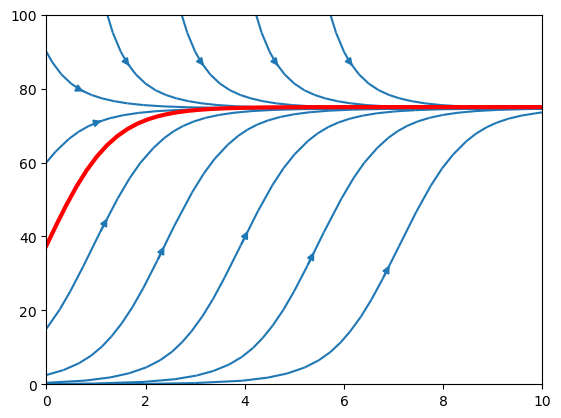

In [6]:
from numpy import linspace, meshgrid, ones, exp

r=1.5; C=75

t = linspace(0,10,10)   #t vals
x = linspace(0,100,10)  #x vals
T,X = meshgrid(t,x)     #2D grid points

#Gridwise vector values:
U=ones(T.shape)         #1st vector component
V=r*X*(1-X/C)           #2nd vector component

start = [[0,15],[0,60],[0,90],[0,2.5],[0,0.4],[0,0.07],[0,0.011],
         [1.5,90],[3,90],[4.5,90],[6,90]]

plt.streamplot(T,X,U,V,start_points=start,density=0.2,broken_streamlines=False)

# Smooth plot of analytic solution:
t = linspace(0, 10)
plt.plot(t,C/(1+exp(-r*t)),'r',linewidth=3)
plt.show()

## Second derivative problem

The explicit Euler formula corresponding to $\dot{\underline{x}}=f(\underline{x})$ is given by:

\begin{equation}
\underline{x}_{k+1}=\underline{x}_k+hf(\underline{x}_k)
\end{equation}

The solution trajectory takes forward steps along the vector direction defined by the gradient vector $f(\underline{x}_k)$. We will look at the projection of this vector field in the $(x,y)$ plane, together with the solution curve, which satisfies $y=rx(1-x/C)$:

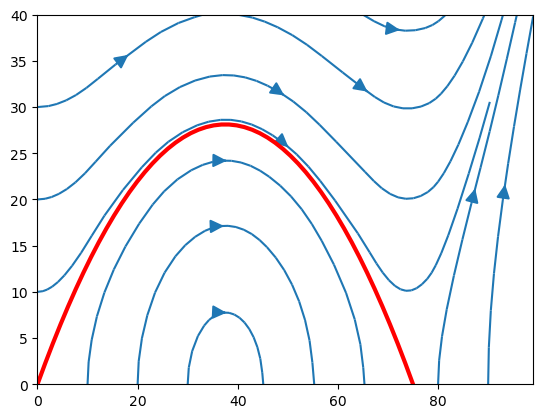

In [7]:
import matplotlib.pyplot as plt
from numpy import linspace, meshgrid, ones, exp
plt.rcParams['axes.xmargin'] = 0

r=1.5; C=75

x = linspace(0,100,10)
y = linspace(0,40,10)
X,Y = meshgrid(x,y)

U=Y
V=(r/C)**2 * X * (C-X) * (C-2*X)

start=[[0,10],[0,20],[0,30],[40,40],[65,40],[80,0],[90,0],
       [10,0],[20,0],[30,0]]

plt.streamplot(X,Y,U,V,start_points=start,arrowsize=2,density=0.3,broken_streamlines=False)

x = linspace(0, C)
plt.plot(x,r*x*(1-x/C),'r',linewidth=3)
plt.show()

We can see that as $x$ approaches the equilibrium solution $x=C$ the trajectories of nearby solution move strongly away from the solution to the IVP. This explains why explicit solvers may struggle as the equilibrium state is approached.